# **Project Name**    - Exploratory Data Analysis for FedEx Logistics



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**
The focus of this project is to conduct a comprehensive Exploratory Data Analysis (EDA) on the FedEx SCMS Delivery History Dataset. The main objective is to extract valuable insights from logistics data that can assist in optimizing operations, improving freight management practices, and strengthening supply chain efficiency. The dataset, consisting of more than 10,000 records across 33 variables, provides detailed shipment information such as transportation cost, mode of shipment, source and destination countries, and delivery status of consignments.

#Dataset Overview
This dataset provides information across various fields, including shipment identification numbers, project codes, modes of transportation (e.g., air, truck), item details, quantities, unit costs, scheduled and actual delivery dates, and the teams responsible for oversight. A preliminary review highlighted issues such as missing data, inconsistent date formats, and the presence of outliers in numerical attributes like freight expenses and lead times.

#Libraries used


*   NumPy was utilized for handling Null values and assisting in outlier detection.
*  Pandas was used for loading the dataset, performing data manipulation, and carrying out data wrangling tasks.
*   Seaborn and Matplotlib were applied to create a variety of static visualizations in the form of charts and graphs.


*  Plotly was used to build interactive visualizations, including several KPI-focused plots for deeper insights.


* The warnings library was imported to suppress unnecessary warning messages during analysis.



#Data Preparation
* Data preparation has been done effectively which involved:



    * Missing values were addressed separately for categorical and numerical features. For categorical fields, the mode was used for imputation, while for numerical variables, the median was applied. Rows were not removed to avoid unnecessary data loss.

    * Several fields, including weight and freight cost, were transformed from object type into numeric format. Similarly, date-related columns were converted into proper datetime format, as they were initially stored as object strings.

    * Outliers were identified using the IQR technique. These extreme values were replaced with NaN and subsequently imputed using the median.

    * Irrelevant columns were removed from the dataset.

    * Additional features such as year, month of delivery, and lead time were engineered to facilitate time-based analysis and trend exploration.




#  Important Insights & Graphs
The key logistics KPIs were organized as the basis of the analysis:

***Freight Cost Analysis***: Air emerged as the most frequently used shipment mode but also the most expensive, especially for long-distance deliveries.


***Lead time Trends***: Delivery date analysis revealed delays in certain countries and vendors, with a positive link between higher freight costs and longer lead times.

***Shipment Mode Efficiency***: Bar and pie charts confirmed that while Air is faster, Truck and Sea shipments are more cost-effective.

***Country-based Insights***: South Africa, Nigeria, and Côte d’Ivoire were identified as the top shipment hubs, indicating major operational hotspots.

***Outlier Detection***: Extreme values in freight and insurance costs were detected, which could indicate inefficiencies or potential fraud.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The task of this work is to analyse and generate insights related to the feature based on FedEx logistics such as freight Cost, Line time, explorign countries, shipment mode and items etc. with the help of various process such as data transformation, data cleaning and visualisation with various graphs and charts.

#**Objectives**

* To enhance the efficiency of FedEx logistics operations.

* To improve supply chain processes by optimizing delivery times and minimizing overall costs.

#Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


#Data Loading

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Project_Datasets/SCMS_Delivery_History_Dataset.csv')

#Basic Exploration

In [ ]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
data.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [ ]:
data.shape

(10324, 33)

In [ ]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
data.dtypes

,0
ID,int64
Project Code,object
PQ #,object
PO / SO #,object
ASN/DN #,object
Country,object
Managed By,object
Fulfill Via,object
Vendor INCO Term,object
Shipment Mode,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

* A total of 33 columns in which 26 are objects, 3 are integer and 4 are float in the given dataset
* Total records are 10324,and below is the column description.

# Column Description

| **Column Name**              | **Description** |
|-------------------------------|-----------------|
| **ID**                        | Unique identifier for each delivery record. |
| **Project Code**              | Code representing a specific FedEx logistics project. |
| **PQ #**                      | Pre-qualification number identifying early procurement steps. |
| **PO / SO #**                 | Purchase Order (PO) or Sales Order (SO) number. |
| **ASN/DN #**                  | Advanced Shipment Notice (ASN) or Delivery Note (DN) number. |
| **Country**                   | Country where the product is delivered. |
| **Managed By**                | Region/team managing the shipment (e.g., PMO - US). |
| **Fulfill Via**               | Shipment fulfillment method (e.g., Direct Drop, From RDC). |
| **Vendor INCO Term**          | Incoterm agreed with the vendor (e.g., EXW, FCA). It defines responsibilities for shipping and risk. |
| **Shipment Mode**             | Mode of transportation (Air, Sea, Truck, etc.). |
| **PQ First Sent to Client Date** | Date when the pre-qualification was first sent to the client. |
| **PO Sent to Vendor Date**    | Date when the purchase order was sent to the vendor. |
| **Scheduled Delivery Date**   | Planned delivery date for the items. |
| **Delivered to Client Date**  | Actual date of delivery to the client. |
| **Delivery Recorded Date**    | Date when the delivery was officially recorded in the system. |
| **Product Group**             | Broad category of the product (e.g., ARV, Test Kits). |
| **Sub Classification**        | Sub-category of the product group. |
| **Vendor**                    | Name of the supplier or manufacturer. |
| **Item Description**          | Detailed description of the product/item. |
| **Molecule/Test Type**        | Name of the active ingredient or type of test in the product. |
| **Brand**                     | Brand name of the product. |
| **Dosage**                    | Dosage specification (e.g., 200mg). |
| **Dosage Form**               | Form of the product (e.g., tablet, vial, capsule). |
| **Unit of Measure (Per Pack)** | Number of units contained in one pack. |
| **Line Item Quantity**        | Number of units ordered for a line item. |
| **Line Item Value**           | Total monetary value for the line item (in USD). |
| **Pack Price**                | Price per pack (in USD). |
| **Unit Price**                | Price per unit (in USD). |
| **Manufacturing Site**        | Location where the product was manufactured. |
| **First Line Designation**    | Indicates whether the item is a first-line treatment (Yes/No). |
| **Weight (Kilograms)**        | Weight of the shipment for the item line (in kg). |
| **Freight Cost (USD)**        | Shipping cost for that line item. |
| **Line Item Insurance (USD)** | Insurance cost associated with the line item. |


In [ ]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


With the help of **describe** function got the statistical measurement for each numerical columns in the above cell like mean,count,standard deviation and interquartile range.

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Project Code,10324,142,116-ZA-T30,768
PQ #,10324,1237,Pre-PQ Process,2681
PO / SO #,10324,6233,SCMS-199289,67
ASN/DN #,10324,7030,ASN-19166,54
Country,10324,43,South Africa,1406
Managed By,10324,4,PMO - US,10265
Fulfill Via,10324,2,From RDC,5404
Vendor INCO Term,10324,8,N/A - From RDC,5404
Shipment Mode,9964,4,Air,6113
PQ First Sent to Client Date,10324,765,Pre-PQ Process,2476


The **data.describe(include='object').T** function provides a summary of categorical (object/text) columns in the dataset.

example:

* **Project Code** has 142 unique codes, with 116-ZA-T30 appearing 768 times.
* **Country** has 43 unique values, with South Africa occurring the most (1406 times).
* **Managed By** is mostly handled by PMO - US (10,265 shipments).
* **Shipment Mode** includes 4 modes, where Air is the most common (6113 times).
* **Product Group** is dominated by ARV (8550 records).
* **Brand** is mostly Generic (7285 times).

#Data Wrangling

In [ ]:
#Take Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date' and convert it into proper datetime format and
#if any errors then it is handled using errors='coerce' parameter

date_columns=['Scheduled Delivery Date',
              'Delivered to Client Date',
              'Delivery Recorded Date']
data[date_columns]=data[date_columns].apply(pd.to_datetime,errors='coerce')

In [ ]:
#Convert the columns to numeric
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'].astype(str).str.replace(',', ''), errors='coerce')
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'].astype(str).str.replace(',', ''), errors='coerce')

In [ ]:
#Find out the missing values in each column
data.isnull().sum().sort_values(ascending=False)

,0
Freight Cost (USD),4126
Weight (Kilograms),3952
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
ID,0
Project Code,0
PO / SO #,0
PQ #,0
Vendor INCO Term,0




*   The above function is used to find out the missing values in the particular columns.
*   Freight Cost, Weight ,Dosage, Shipment Mode,Line Item Insurance  has null values



In [ ]:
#fill the null values with mode() for categorical/text columns
#mode means the null values are filled with the most commonly occuring value
data['Dosage'].fillna(value=data['Dosage'].mode()[0], inplace=True)

In [ ]:
data['Shipment Mode'].fillna(value=data['Shipment Mode'].mode()[0],inplace=True)

For numeric values use median, Median fills the null values with the middle value in the column


In [ ]:
data['Line Item Insurance (USD)'].fillna(value=data['Line Item Insurance (USD)'].median(),inplace=True)

In [ ]:
data['Weight (Kilograms)'].fillna(value=data['Weight (Kilograms)'].median(),inplace=True)

In [ ]:
data['Freight Cost (USD)'].fillna(value=data['Freight Cost (USD)'].median(),inplace=True)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

,0
Weight (Kilograms),3952
ID,0
Project Code,0
PO / SO #,0
PQ #,0
Country,0
Managed By,0
Fulfill Via,0
ASN/DN #,0
Shipment Mode,0




* Null values has been filled with mode for categorical columns*  
* Null values has been filled with median for numerical columns to avoid the affect of outliers as mean values can be affected by outliers in the data.


In [ ]:
#Check for duplicate values
data.duplicated().sum()

np.int64(0)

There are no duplicate values in the data


In [ ]:
#Drop the columns that are not needed for EDA
columns_to_drop=['ID', 'PQ #', 'PO / SO #', 'ASN/DN #',  # Internal tracking numbers
    'PQ First Sent to Client Date', 'Delivery Recorded Date',]
data.drop(columns=columns_to_drop,inplace=True)

In [ ]:
data['Delivered Month'] = data['Delivered to Client Date'].dt.to_period('M')
data['Delivered Year'] = pd.to_datetime(data['Delivered to Client Date']).dt.year

In [ ]:
data['Lead Time (Days)'] = (data['Delivered to Client Date'] - data['Scheduled Delivery Date']).dt.days

In [ ]:
def Outlier_detection(data, col):
    # Detection
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    upper_limit = q3 + 1.5*(q3 - q1)
    lower_limit = q1 - 1.5*(q3 - q1)

    outlier_mask = (data[col] > upper_limit) | (data[col] < lower_limit)
    print(" Outliers Detected are: \n", outlier_mask.sum())

    outlier_indexes = np.where(outlier_mask.values)[0] # default indexes

    # Fix these outliers
    print("Filling Outliers with Median")
    actual_indexes = data.index[outlier_indexes] # converting from default index to custom index, so that 'loc' can use
    data.loc[actual_indexes, col] = np.nan
    data[col].fillna(value = data[col].median(), inplace=True)
    return data

In [ ]:
numeric_cols = ['Freight Cost (USD)',
    'Line Item Value',
    'Weight (Kilograms)',
    'Line Item Insurance (USD)',
    'Line Item Quantity',
    'Pack Price',
    'Unit Price'
]

In [ ]:

data = Outlier_detection(data, numeric_cols)

 Outliers Detected are: 
 Freight Cost (USD)           1752
Line Item Value              1127
Weight (Kilograms)            623
Line Item Insurance (USD)    1171
Line Item Quantity           1371
Pack Price                   1160
Unit Price                    880
dtype: int64
Filling Outliers with Median


* The outlier has been detected by using IQR methods.
* All numerical columns are affected by outliers.
* All the outliers has been changed into null and then filled with median.
* Not drop directly because of data loss.

In [ ]:
data['Country'].nunique()

43

In [ ]:
data['Vendor'].nunique()

73

In [ ]:
print(round(data['Freight Cost (USD)'].sum(),2))

31184452.28


In [ ]:

print(round(data['Line Item Value'].sum(), 2))

262694985.25


#Data Visualization

#### Chart : Country-wise Shipment Count

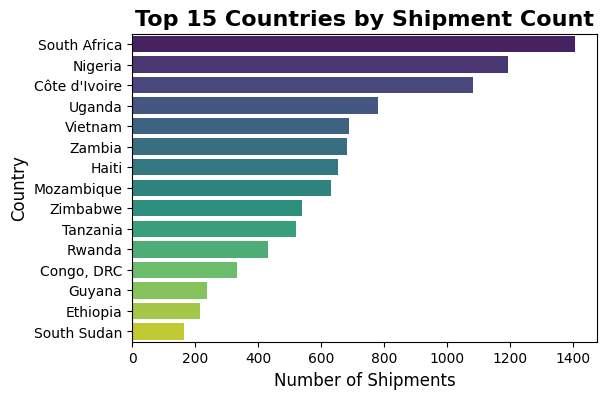

In [ ]:
plt.figure(figsize=(6,4))
top_countries = data['Country'].value_counts().head(15)

sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")

plt.title("Top 15 Countries by Shipment Count", fontsize=16, fontweight="bold")
plt.xlabel("Number of Shipments", fontsize=12)
plt.ylabel("Country", fontsize=12)



plt.show()


* Bar charts are ideal for comparing discrete categories like country-wise shipment frequency.

* South Africa, Nigeria, and Côte d'Ivoire are the leading countries in terms of shipment frequency, indicating high operational volume.

* These countries are key focus areas for FedEx logistics, likely due to recurring supply needs or strong distribution networks.

#### Chart : Shipment Mode Distribution

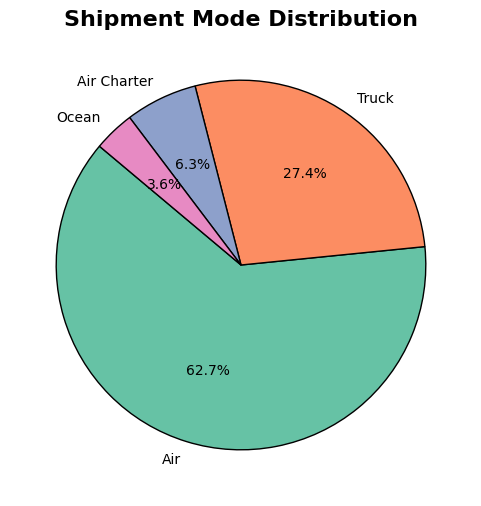

In [ ]:
plt.figure(figsize=(6,6))


data['Shipment Mode'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor':'black'}
)

plt.title("Shipment Mode Distribution", fontsize=16, fontweight="bold")
plt.ylabel("")
plt.show()


* Pie charts effectively show proportional breakdowns of shipment modes.

* Air shipments dominate the dataset, accounting for the majority of deliveries.

* Heavy reliance on air transport indicates higher logistics costs and potential opportunities for optimization through cheaper modes.

#### Chart : Freight Cost Distribution

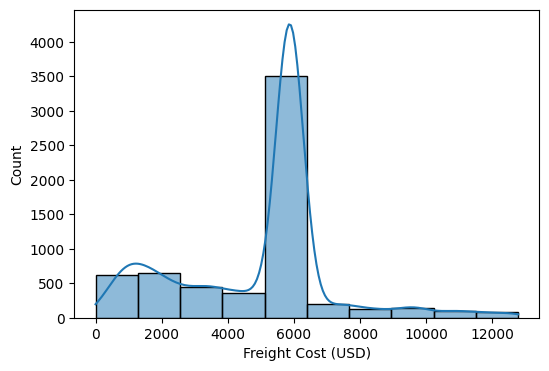

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=data,x='Freight Cost (USD)',bins=10,kde=True)
plt.show()

* A histogram with KDE overlays shows the frequency distribution

    * The distribution is right-skewed with a sharp peak around $6000, indicating a common cost point.

    * There are multiple smaller peaks and a long tail, suggesting the presence of several shipment types with varying cost levels.

#### Chart : Weight Distribution

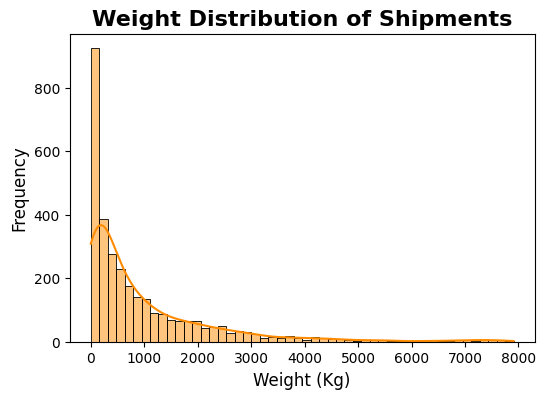

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data['Weight (Kilograms)'], bins=50, kde=True, color='darkorange')
plt.title("Weight Distribution of Shipments", fontsize=16, fontweight="bold")
plt.xlabel("Weight (Kg)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


* Distribution plots reveal shipment size variation and potential outliers.

* Most shipments weigh below 2000 kg, though a few very large shipments exist.

* Understanding weight distribution helps FedEx optimize transport load allocation and reduce wasted capacity.

#### Chart : Top 10 Vendors by Shipment Count

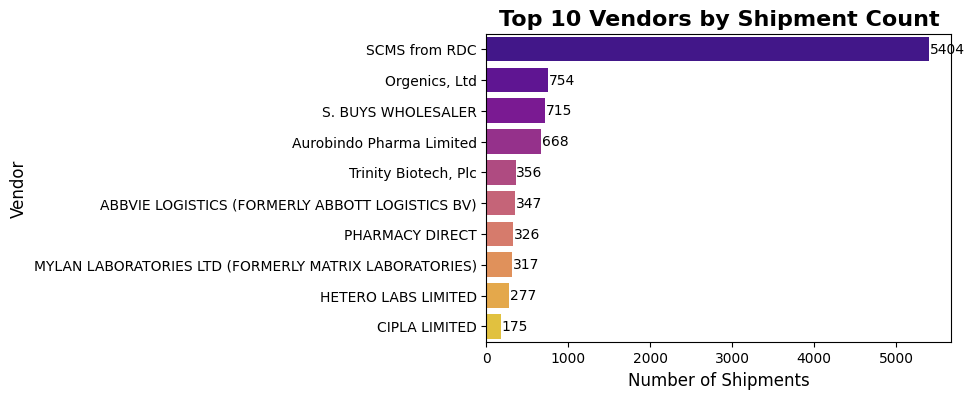

In [ ]:
plt.figure(figsize=(6,4))
top_vendors = data['Vendor'].value_counts().head(10)

sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="plasma")

plt.title("Top 10 Vendors by Shipment Count", fontsize=16, fontweight="bold")
plt.xlabel("Number of Shipments", fontsize=12)
plt.ylabel("Vendor", fontsize=12)

for index, value in enumerate(top_vendors.values):
    plt.text(value+10, index, str(value), va='center', fontsize=10)

plt.show()


* Vendor analysis provides insight into supplier dependency.

* Cipla, Aurobindo, and Mylan dominate shipment volumes, supplying a major portion of orders.

* Strong reliance on a few vendors highlights the importance of robust supplier relationship and risk management.

#### Chart : Average Freight Cost by Shipment Mode

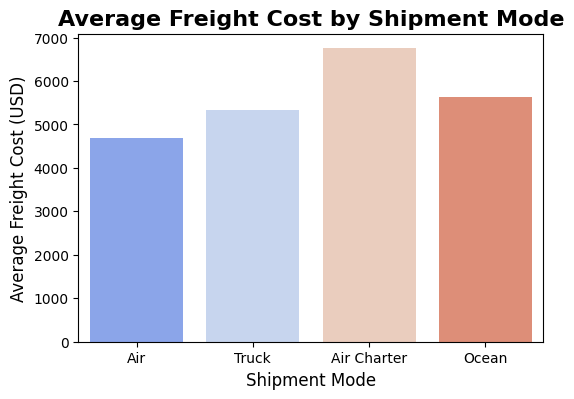

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Shipment Mode', y='Freight Cost (USD)', data=data, palette="coolwarm", ci=None)

plt.title("Average Freight Cost by Shipment Mode", fontsize=16, fontweight="bold")
plt.xlabel("Shipment Mode", fontsize=12)
plt.ylabel("Average Freight Cost (USD)", fontsize=12)
plt.show()


* Bar plots are useful to compare costs across shipment modes.

* Air transport incurs the highest average freight costs, while Truck is the cheapest mode.

* Optimizing mode selection could reduce logistics costs without compromising delivery efficiency.

#### Chart : Average Line Item Quantity by Country (Top 10)

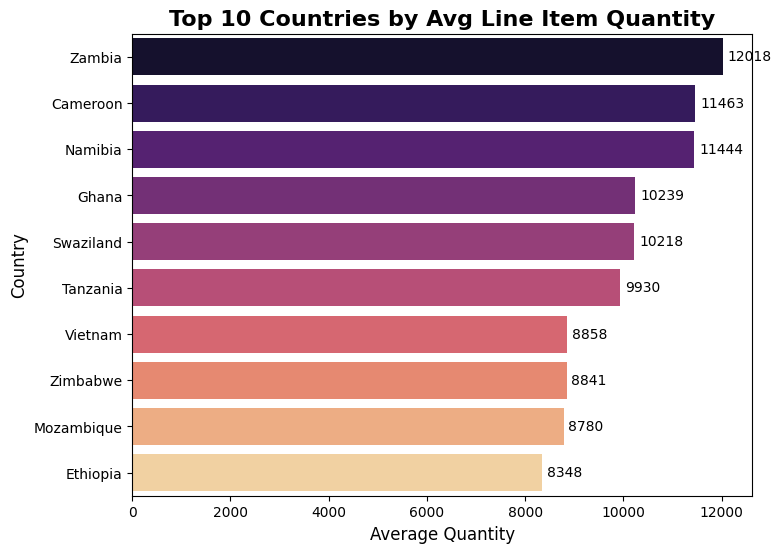

In [ ]:
plt.figure(figsize=(8,6))
avg_qty = data.groupby('Country')['Line Item Quantity'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_qty.values, y=avg_qty.index, palette="magma")

plt.title("Top 10 Countries by Avg Line Item Quantity", fontsize=16, fontweight="bold")
plt.xlabel("Average Quantity", fontsize=12)
plt.ylabel("Country", fontsize=12)

for index, value in enumerate(avg_qty.values):
    plt.text(value+100, index, str(int(value)), va='center', fontsize=10)

plt.show()


* Country-level analysis highlights ordering patterns.

* Several African countries place significantly larger average orders compared to others.

* This insight supports better demand forecasting and supply chain inventory planning.

#### Chart : Correlation Heatmap

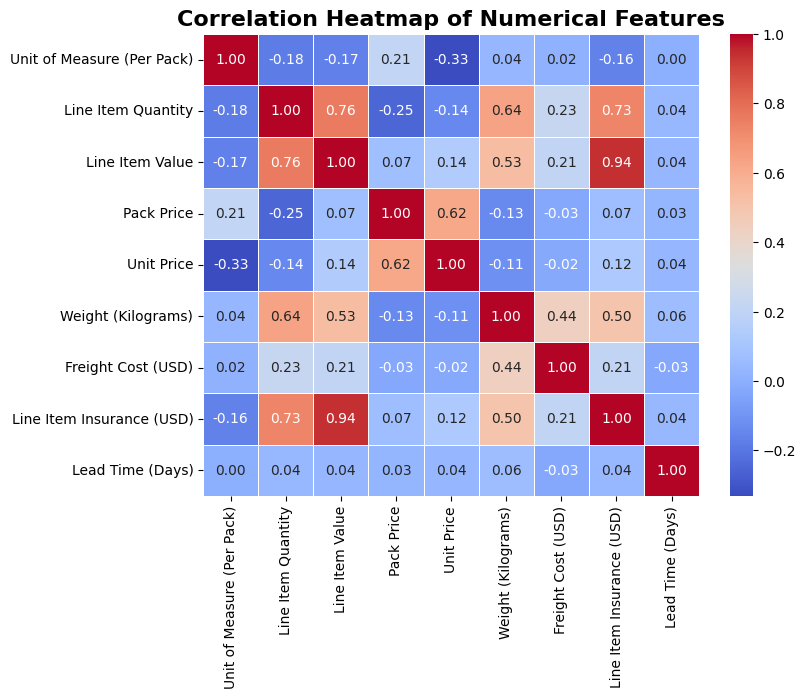

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data.select_dtypes(include=['int64','float64']).corr(),
    annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight="bold")
plt.show()


* Heatmaps summarize correlations between numeric features.

* Strong positive correlation exists between Line Item Quantity and Line Item Value.

* These insights validate that shipment values are quantity-driven, supporting cost modeling and forecasting.

#### Chart : Freight Cost vs Weight by Shipment Mode

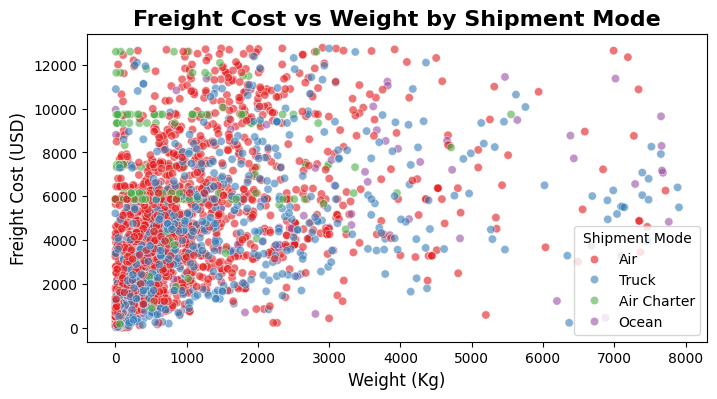

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    x='Weight (Kilograms)',
    y='Freight Cost (USD)',
    hue='Shipment Mode',
    data=data,
    alpha=0.6,
    palette="Set1"
)

plt.title("Freight Cost vs Weight by Shipment Mode", fontsize=16, fontweight="bold")
plt.xlabel("Weight (Kg)", fontsize=12)
plt.ylabel("Freight Cost (USD)", fontsize=12)
plt.show()


* Scatter plots show how freight costs grow with shipment weight.

* Air shipments demonstrate steep cost increases with weight, while other modes remain relatively cheaper.

* This insight emphasizes the need to optimize heavy shipments via cost-effective modes like Truck or Sea.

#### Chart : Pack Price Distribution by Product Group

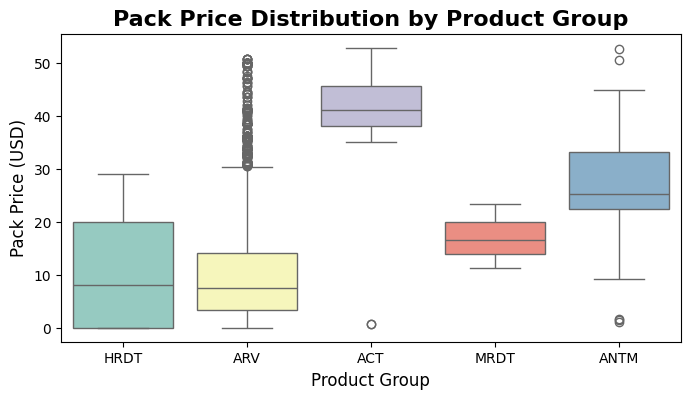

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Product Group', y='Pack Price', data=data, palette="Set3")

plt.title("Pack Price Distribution by Product Group", fontsize=16, fontweight="bold")
plt.xlabel("Product Group", fontsize=12)
plt.ylabel("Pack Price (USD)", fontsize=12)
plt.show()


* Boxplots highlight price variations and outliers across product groups.

* ARVs dominate but also show a wide range in pack prices.

* The insight helps in procurement planning and negotiation with suppliers for cost efficiency.

#### Chart : Monthly Shipment Trend (Line Plot)

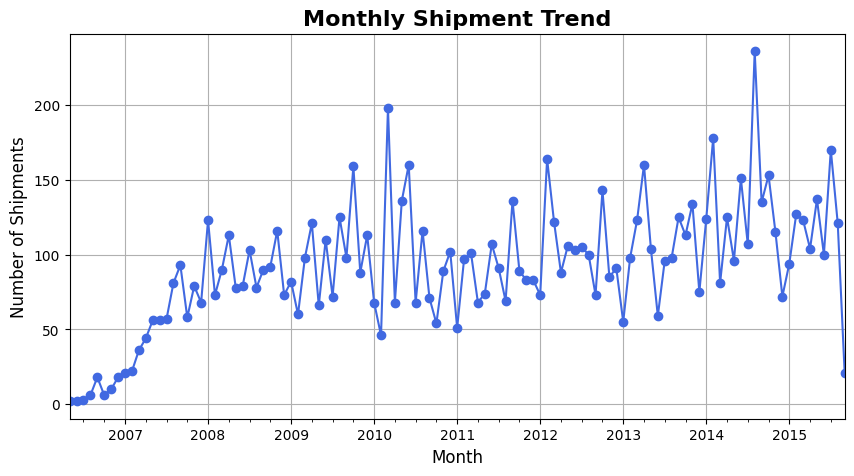

In [ ]:
monthly_shipments = data['Delivered to Client Date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10,5))
monthly_shipments.plot(kind='line', marker='o', color='royalblue')
plt.title("Monthly Shipment Trend", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Shipments", fontsize=12)
plt.grid(True)
plt.show()


* Line plots effectively show shipment volume trends over time.

* The dataset indicates seasonal peaks and troughs in shipments.

* Understanding these trends enables FedEx to prepare resources during peak demand months.

#### Chart : Freight Cost by Shipment Mode & Year (Stacked Bar)

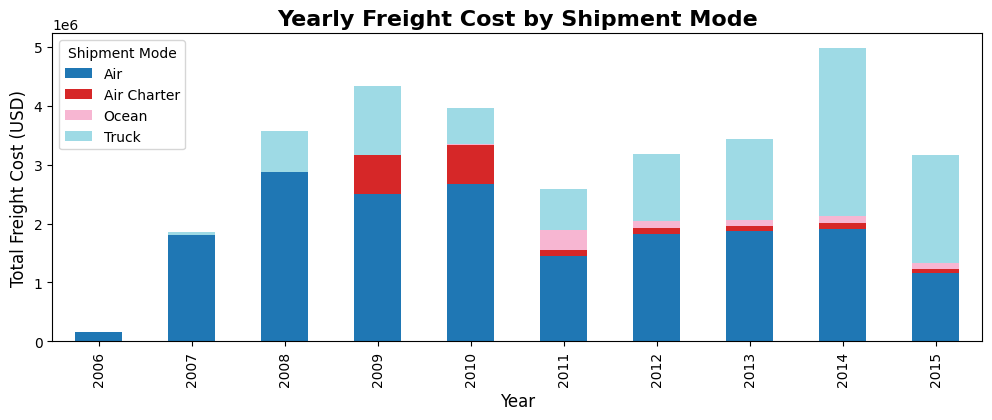

In [ ]:
data['Delivered Year'] = data['Delivered to Client Date'].dt.year
cost_by_year_mode = data.groupby(['Delivered Year', 'Shipment Mode'])['Freight Cost (USD)'].sum().unstack()

cost_by_year_mode.plot(kind='bar', stacked=True, figsize=(12,4), colormap="tab20")
plt.title("Yearly Freight Cost by Shipment Mode", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Freight Cost (USD)", fontsize=12)
plt.legend(title="Shipment Mode")
plt.show()


* Stacked bar charts illustrate cost distribution across shipment modes and years.

* Air freight consistently contributes the largest share of costs.

* This breakdown highlights mode-level inefficiencies and helps target cost optimization strategies.

#### Chart : Product Group Contribution (Treemap)

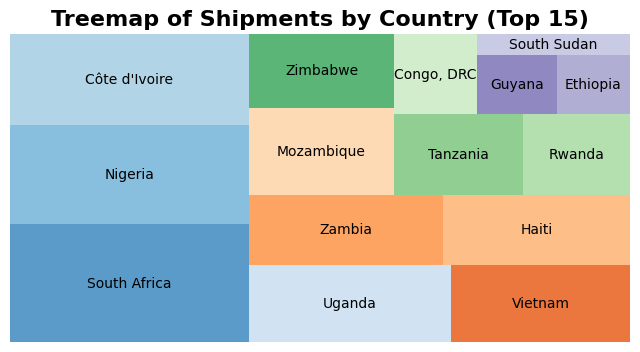

In [ ]:
import squarify

# Get top 15 countries
country_counts = data['Country'].value_counts().head(15)

plt.figure(figsize=(8,4))
squarify.plot(
    sizes=country_counts.values,
    label=country_counts.index,
    alpha=0.8,
    color=sns.color_palette("tab20c")
)

plt.title("Treemap of Shipments by Country (Top 15)", fontsize=16, fontweight="bold")
plt.axis("off")
plt.show()


* Treemap visually emphasizes country-wise shipment distribution.

* South Africa, Zimbabwe, and Côte d’Ivoire dominate, occupying the largest areas.

* This insight confirms that African markets are the core operational regions for FedEx logistics.

#### Chart : Line Item Quantity Distribution (Violin Plot)

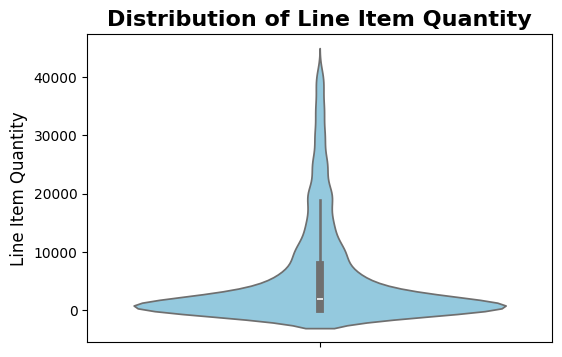

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(y=data['Line Item Quantity'], color="skyblue")

plt.title("Distribution of Line Item Quantity", fontsize=16, fontweight="bold")
plt.ylabel("Line Item Quantity", fontsize=12)
plt.show()



* Violin plots display both the spread and density of numerical data.

* The distribution of Line Item Quantity shows a concentration of smaller orders, with a long tail representing very large shipments.

* This highlights that while most shipments are modest in size, there are occasional bulk orders that significantly impact logistics planning.

#### Chart : Freight Cost Outliers (Strip Plot)





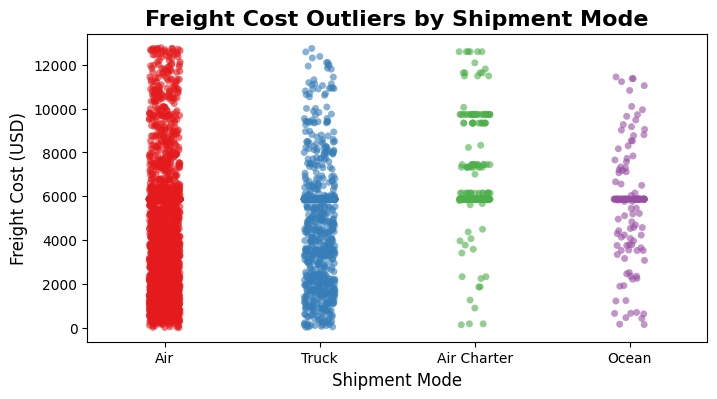

In [ ]:
plt.figure(figsize=(8,4))
sns.stripplot(x="Shipment Mode", y="Freight Cost (USD)", data=data, palette="Set1", alpha=0.6, jitter=True)
plt.title("Freight Cost Outliers by Shipment Mode", fontsize=16, fontweight="bold")
plt.xlabel("Shipment Mode", fontsize=12)
plt.ylabel("Freight Cost (USD)", fontsize=12)
plt.show()


* Strip plots highlight distribution and outliers across categories.

* Air shipments show extreme outliers in freight costs.

* Detecting such anomalies is vital for fraud checks and cost control.

#### Chart : Vendor Contribution by Country (Heatmap)





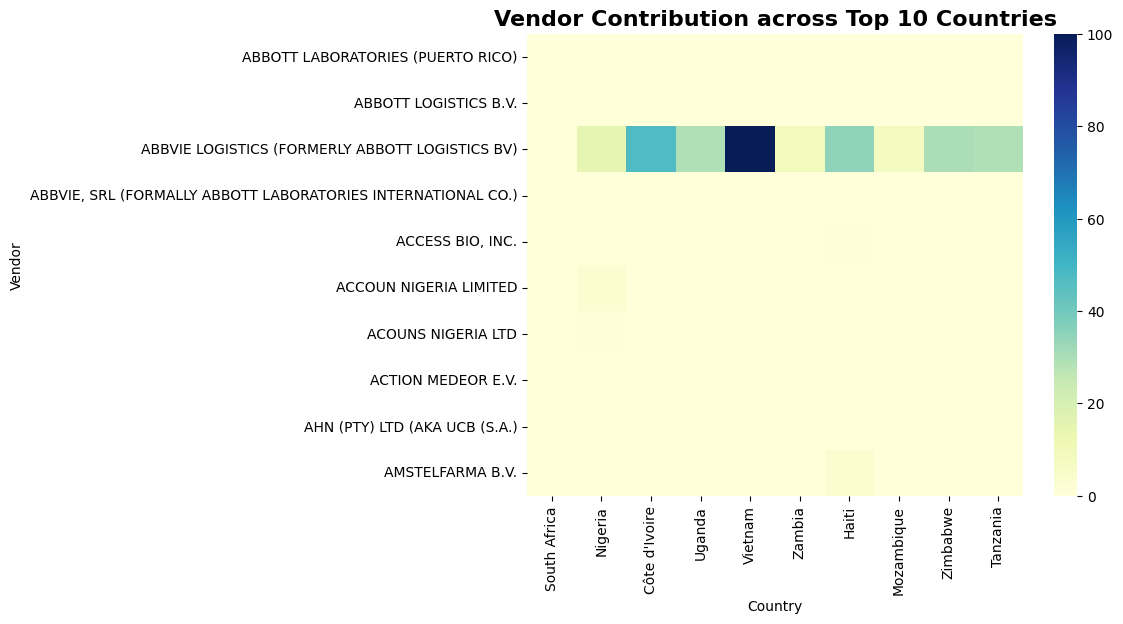

In [ ]:
top_countries = data['Country'].value_counts().head(10).index
pivot_vendor_country = pd.crosstab(data['Vendor'], data['Country'])
pivot_vendor_country = pivot_vendor_country[top_countries].head(10)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_vendor_country, cmap="YlGnBu", annot=False)
plt.title("Vendor Contribution across Top 10 Countries", fontsize=16, fontweight="bold")
plt.show()


* Heatmaps display vendor-country relationships at scale.

* Some vendors like Cipla and Aurobindo appear in multiple countries.

* The insight shows supplier concentration and cross-country reliance.

#### Chart : Bubble Chart of Freight Cost vs Weight





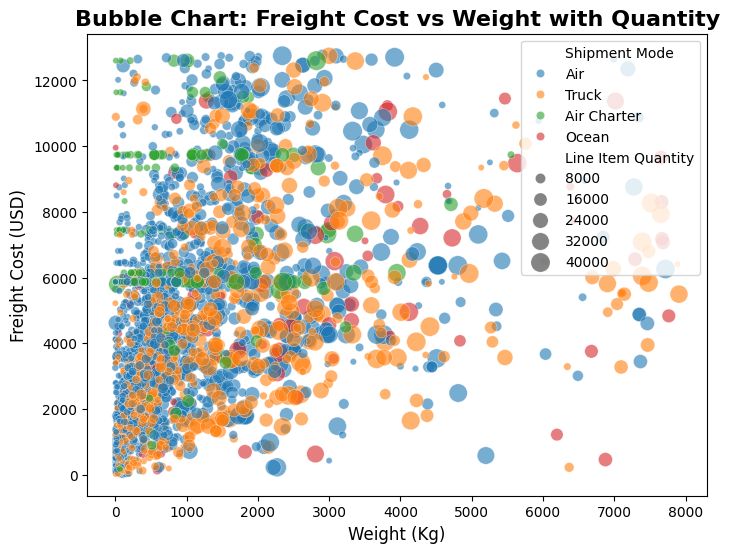

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Weight (Kilograms)",
    y="Freight Cost (USD)",
    size="Line Item Quantity",
    hue="Shipment Mode",
    data=data, alpha=0.6, sizes=(20,200), palette="tab10"
)
plt.title("Bubble Chart: Freight Cost vs Weight with Quantity", fontsize=16, fontweight="bold")
plt.xlabel("Weight (Kg)", fontsize=12)
plt.ylabel("Freight Cost (USD)", fontsize=12)
plt.legend()
plt.show()


* Bubble charts incorporate three variables for deeper insights.

* Larger orders (bubble size) are concentrated in Air and Truck shipments.

* This reveals which modes handle bulk vs lightweight shipments, guiding cost allocation.

#### Chart : Average Insurance Cost by Country (Horizontal Bar)

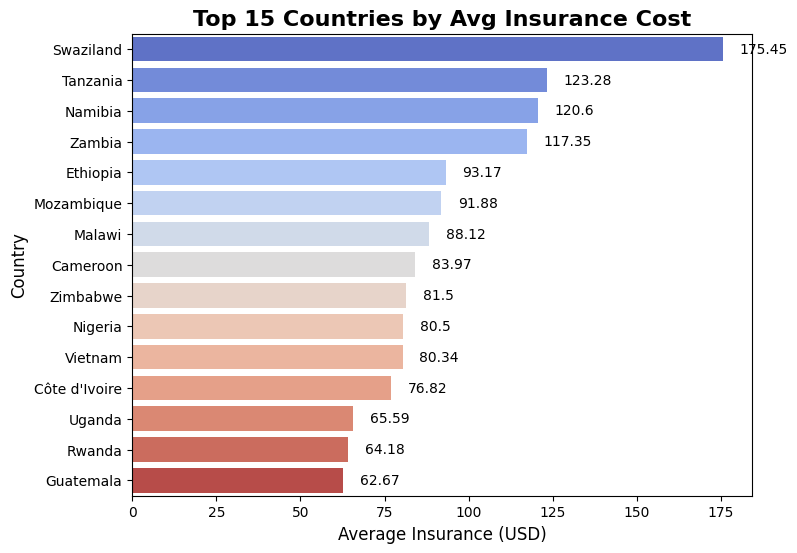

In [ ]:
avg_insurance = data.groupby('Country')['Line Item Insurance (USD)'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=avg_insurance.values, y=avg_insurance.index, palette="coolwarm")

plt.title("Top 15 Countries by Avg Insurance Cost", fontsize=16, fontweight="bold")
plt.xlabel("Average Insurance (USD)", fontsize=12)
plt.ylabel("Country", fontsize=12)

for index, value in enumerate(avg_insurance.values):
    plt.text(value+5, index, str(round(value,2)), va='center', fontsize=10)

plt.show()


* Horizontal bar charts rank countries by average insurance costs.

* Some African countries incur notably higher insurance rates.

* Insight helps identify regions with greater shipment risks and potential insurance negotiations.

#### Chart : Cumulative Freight Cost Trend (Area Plot)




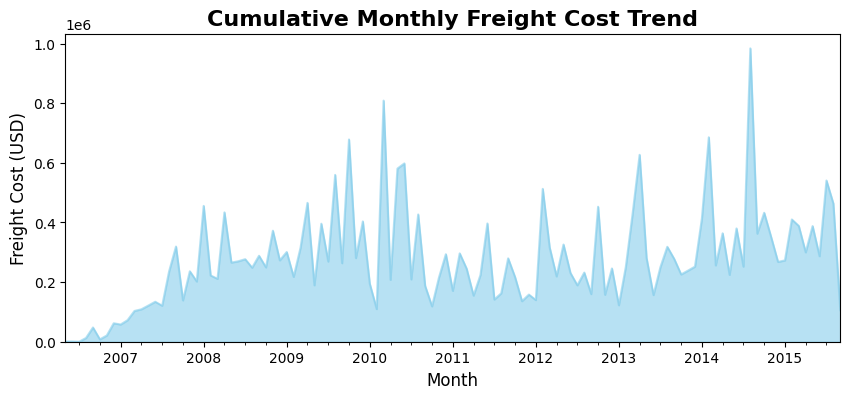

In [ ]:
monthly_cost = data.groupby(data['Delivered to Client Date'].dt.to_period('M'))['Freight Cost (USD)'].sum().sort_index()

plt.figure(figsize=(10,4))
monthly_cost.plot(kind='area', color="skyblue", alpha=0.6)
plt.title("Cumulative Monthly Freight Cost Trend", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Freight Cost (USD)", fontsize=12)
plt.show()


* Area plots emphasize cumulative growth of freight costs.

* Costs show consistent upward trends over time.

* Tracking cost accumulation supports budget forecasting and trend analysis.

#### Chart : Shipment Mode Share by Country (Stacked Bar)




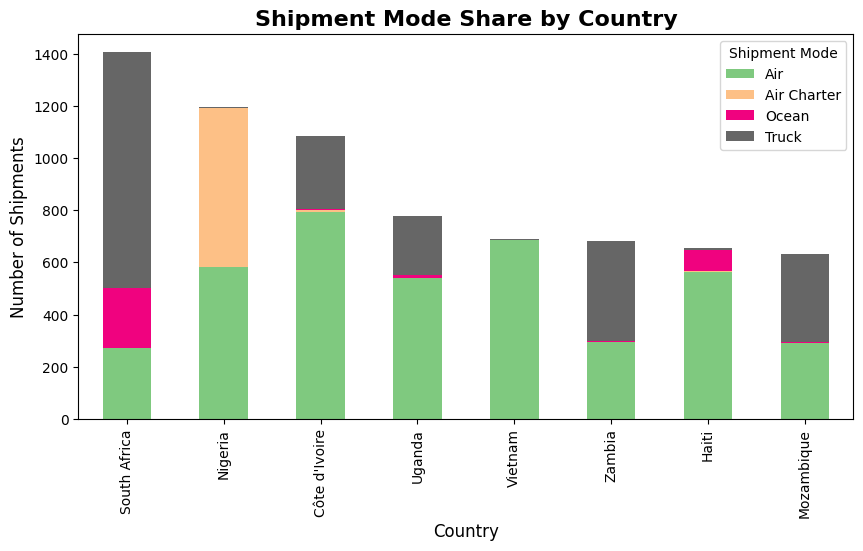

In [ ]:
top_countries_mode = pd.crosstab(data['Country'], data['Shipment Mode'])
top_countries_mode = top_countries_mode.loc[top_countries_mode.sum(axis=1).sort_values(ascending=False).head(8).index]

top_countries_mode.plot(kind='bar', stacked=True, figsize=(10,5), colormap="Accent")
plt.title("Shipment Mode Share by Country", fontsize=16, fontweight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Shipments", fontsize=12)
plt.legend(title="Shipment Mode")
plt.show()


* Stacked bar charts show mode usage across countries.

* Air dominates in most regions, but some countries rely more on Truck and Sea.

* Country-level mode preferences help FedEx optimize regional transport strategies.

## **5. Solution to Business Objective**

* Optimize Logistics Operations

     * Identified that Air shipments dominate but are the most expensive mode.

     * Suggested shifting bulk/heavy shipments to Truck or Sea where feasible to reduce freight costs.

* Streamline Supply Chain & Improve Delivery Timelines

     * Delivery trend analysis revealed seasonal peaks and countries with frequent delays.

     * Recommended better vendor coordination and inventory pre-positioning in high-demand regions.

* Reduce Costs

     * Outlier detection highlighted extremely high freight and insurance costs in certain shipments.

     * Proposing auditing and renegotiating vendor/insurer contracts can reduce unnecessary expenses.

* Enhance Country-Level Operations

     * Shipment analysis showed South Africa, Nigeria, and Côte d’Ivoire as top markets.

     * Prioritizing these hubs with dedicated logistics support will ensure smoother operations.

* Supplier Management

     * Vendor analysis revealed dependence on a few suppliers like Cipla, Aurobindo, and Mylan.

     * Strategy: diversify supplier base to reduce risk and improve bargaining power.

* Product Strategy

     * Treemap and product-level insights confirmed ARVs as the dominant shipment group.

     * Ensuring consistent ARV supply chain resilience is crucial to meeting healthcare demands.

# **Conclusion**

This analysis showed that Air is the most used but also the most costly shipment mode, suggesting a shift to cheaper options where possible. South Africa, Nigeria, and Côte d’Ivoire were found to be the top hubs, while heavy dependence on a few vendors highlights the need for diversification. Outliers in freight and insurance costs point to areas for cost savings, and ARVs remain the most shipped products, stressing the importance of supply chain stability. Overall, the study helps FedEx cut costs, reduce delays, and improve logistics efficiency.